# Table of Contents

1. [Introduction](#intro)
2. [Data Collection and Cleaning](#data-collection)
3. [Exploratory Analysis](#exploratory-analysis)
4. [Data Analysis](#data-analysis)
    - [Frequency Distributions](#frequency-distributions)
        - [Interpretation](#frequency-distributions-inter)
    - [Trend Analysis](#trend-analysis)
        - [Interpretation](#trend-analysis-inter)
    - [Comparative Analysis](#comparative-analysis)
        - [Interpretation](#comparative-analysis-inter)
    - [Impact and Risk Analysis](#impact-risk)
        - [Interpretation](#impact-risk-inter)
5. [Conclusions](#conclusions)

# Introduction<a id="intro"></a>

Concussions remain a significant concern in professional sports, with the National Hockey League (NHL) facing its own set of challenges in understanding and managing these injuries. This report delves into the analysis of NHL concussion data spanning from the 2012/13 to the 2022/23 seasons, aiming to shed light on the frequency, impact, and risk associated with concussions in professional ice hockey.

The dataset utilized for this analysis, sourced from Kaggle, provides a comprehensive overview of reported concussions within the NHL during the specified timeframe. It covers various aspects, including the teams involved, player positions, games missed due to concussions, and financial implications for both players and teams.

Throughout this analysis, we explore trends in concussion rates over time, examine the distribution of concussions by team and player position, and delve into the financial impact of these injuries on NHL teams. Additionally, we identify high-risk players, teams, and positions based on historical data, providing insights into areas that require targeted intervention and prevention strategies.

By delving into the nuanced dynamics of concussions in the NHL, this analysis aims to contribute to the ongoing conversation surrounding player safety, injury prevention, and the long-term well-being of athletes in professional sports.

# Data Collection and Cleaning <a id="data-collection"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = "NHL_Concussions_Data.csv"
concussions_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the import
concussions_data.head()


,Season,Team,Position,Player,Injury Type,Cap Hit,Chip,Games Missed,Games Missed.1
0,2012/13,Boston,F,"Bergeron, Patrice",Concussion,5.0,365.853659,6,6
1,2012/13,Boston,F,"Marchand, Brad",Concussion,2.5,60.975610,2,2
2,2012/13,Boston,F,"Thornton, Shawn",Concussion,1.1,26.829268,2,2
3,2012/13,Carolina,F,"LaRose, Chad",Concussion,1.7,207.317073,10,10
4,2012/13,Carolina,F,"Semin, Alexander",Concussion,7.0,170.731707,2,2


In [2]:
# Check for missing values
missing_values = concussions_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values (if necessary)
concussions_data.dropna(inplace=True)

# Check data types
data_types = concussions_data.dtypes
print("\nData Types:\n", data_types)

Missing Values:
 Season            0
Team              0
Position          0
Player            0
Injury Type       0
Cap Hit           0
Chip              0
Games Missed      0
Games Missed.1    0
dtype: int64

Data Types:
 Season             object
Team               object
Position           object
Player             object
Injury Type        object
Cap Hit           float64
Chip              float64
Games Missed        int64
Games Missed.1      int64
dtype: object


In [3]:
# Drop the 'Games Missed.1' column
concussions_data.drop(columns=['Games Missed.1'], inplace=True)

# Extract year from 'Season' column
concussions_data['Season'] = concussions_data['Season'].apply(lambda x: int(x.split('/')[0]) if '/' in x else int(x))

# Display the first few rows of the DataFrame to verify the conversion
concussions_data.head()

,Season,Team,Position,Player,Injury Type,Cap Hit,Chip,Games Missed
0,2012,Boston,F,"Bergeron, Patrice",Concussion,5.0,365.853659,6
1,2012,Boston,F,"Marchand, Brad",Concussion,2.5,60.975610,2
2,2012,Boston,F,"Thornton, Shawn",Concussion,1.1,26.829268,2
3,2012,Carolina,F,"LaRose, Chad",Concussion,1.7,207.317073,10
4,2012,Carolina,F,"Semin, Alexander",Concussion,7.0,170.731707,2


# Exploratory Analysis <a id="exploratory-analysis"></a>

In [4]:
# Basic data exploration
print("\nSummary Statistics:")
summary_stats = concussions_data.describe()
print(summary_stats)

# Unique values for categorical columns
print("\nUnique Values:")
unique_values = concussions_data.nunique()
print(unique_values)

# Exclude non-numeric columns from correlation calculation
numeric_data = concussions_data.select_dtypes(include=['int', 'float'])

# Correlation matrix
correlation_matrix = numeric_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Summary Statistics:
            Season     Cap Hit         Chip  Games Missed
count   404.000000  404.000000   404.000000    404.000000
mean   2016.527228    3.062496   380.698805     10.061881
std       2.865340    2.172304   632.977811     13.090016
min    2012.000000    0.550000     7.926829      1.000000
25%    2014.000000    1.100000    70.487805      3.000000
50%    2017.000000    2.750000   176.067073      6.000000
75%    2019.000000    4.516250   416.666640     11.000000
max    2022.000000   11.000000  5030.487805     82.000000

Unique Values:
Season           11
Team             32
Position          3
Player          310
Injury Type       1
Cap Hit         175
Chip            318
Games Missed     48
dtype: int64

Correlation Matrix:
                Season   Cap Hit      Chip  Games Missed
Season        1.000000  0.148206  0.067860     -0.017808
Cap Hit       0.148206  1.000000  0.379028      0.014010
Chip          0.067860  0.379028  1.000000      0.799415
Games Missed -0.017

### Correlation matrix interpretation
###### Season vs. Cap Hit: 
There is a weak positive correlation (0.148) between the NHL season and the player's cap hit. This suggests that the player's cap hit tends to slightly increase over the seasons.

###### Season vs. Chip: 
There is a weak positive correlation (0.068) between the NHL season and the per-game cap charge of injured players (Chip). This indicates that the per-game cap charge of injured players also tends to slightly increase over the seasons.

###### Season vs. Games Missed: 
There is a very weak negative correlation (-0.018) between the NHL season and the number of games missed due to injury. This suggests that there is almost no systematic relationship between the NHL season and the number of games missed due to injury.

###### Cap Hit vs. Chip: 
There is a moderate positive correlation (0.379) between a player's cap hit and the per-game cap charge of injured players (Chip). This indicates that players with higher cap hits tend to have higher per-game cap charges when injured.
Cap Hit vs. Games Missed: There is a very weak positive correlation (0.014) between a player's cap hit and the number of games missed due to injury. This suggests that there is almost no systematic relationship between a player's cap hit and the number of games missed due to injury.

###### Chip vs. Games Missed: 
There is a strong positive correlation (0.799) between the per-game cap charge of injured players (Chip) and the number of games missed due to injury. This indicates that players with higher per-game cap charges when injured tend to miss more games.

# Data Analysis<a id="data-analysis"></a>

### Frequency Distribution <a id="frequency-distributions"></a>

In [5]:
# Frequency distribution of concussions by season
season_freq = concussions_data['Season'].value_counts().sort_index()
print("\nFrequency distribution of concussions by season:\n", season_freq)

# Frequency distribution of concussions by team
team_freq = concussions_data['Team'].value_counts()
print("\nFrequency distribution of concussions by team:\n", team_freq)

# Frequency distribution of concussions by position
position_freq = concussions_data['Position'].value_counts()
print("\nFrequency distribution of concussions by position:\n", position_freq)

# Frequency distribution of concussions by player
player_freq = concussions_data['Player'].value_counts()
print("\nFrequency distribution of concussions by player:\n", player_freq)

# Distribution of injury types over seasons and teams
injury_type_dist = concussions_data.groupby(['Season', 'Team'])['Injury Type'].value_counts()
print("\nDistribution of injury types over seasons and teams:\n", injury_type_dist)

# Distribution of games missed due to concussions
games_missed_dist = concussions_data['Games Missed'].value_counts().sort_index()
print("\nDistribution of games missed due to concussions:\n", games_missed_dist)


Frequency distribution of concussions by season:
 Season
2012    31
2013    53
2014    37
2015    34
2016    39
2017    46
2018    62
2019    36
2020    21
2021    28
2022    17
Name: count, dtype: int64

Frequency distribution of concussions by team:
 Team
Pittsburgh      32
Carolina        31
Montreal        31
Chicago         28
Boston          24
Ottawa          20
Winnipeg        19
Colorado        18
Vancouver       17
Edmonton        15
Florida         15
Philadelphia    15
St. Louis       14
NY Rangers      13
Toronto         13
Anaheim         11
Minnesota       11
Detroit         10
Dallas           9
New Jersey       8
Columbus         8
Buffalo          7
San Jose         7
NY Islanders     6
Calgary          4
Los Angeles      4
Washington       4
Arizona          3
Phoenix          2
Nashville        2
Vegas            2
Tampa Bay        1
Name: count, dtype: int64

Frequency distribution of concussions by position:
 Position
F    234
D    122
G     48
Name: count, dtype

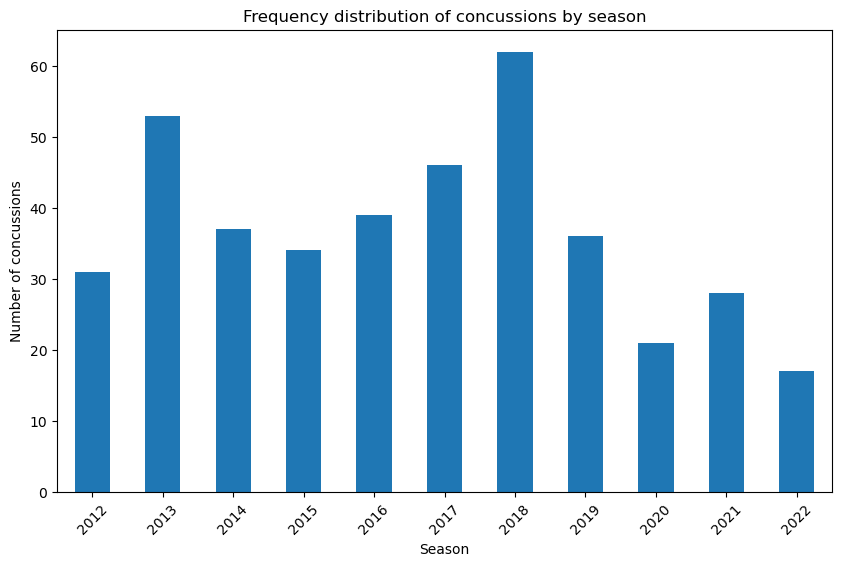

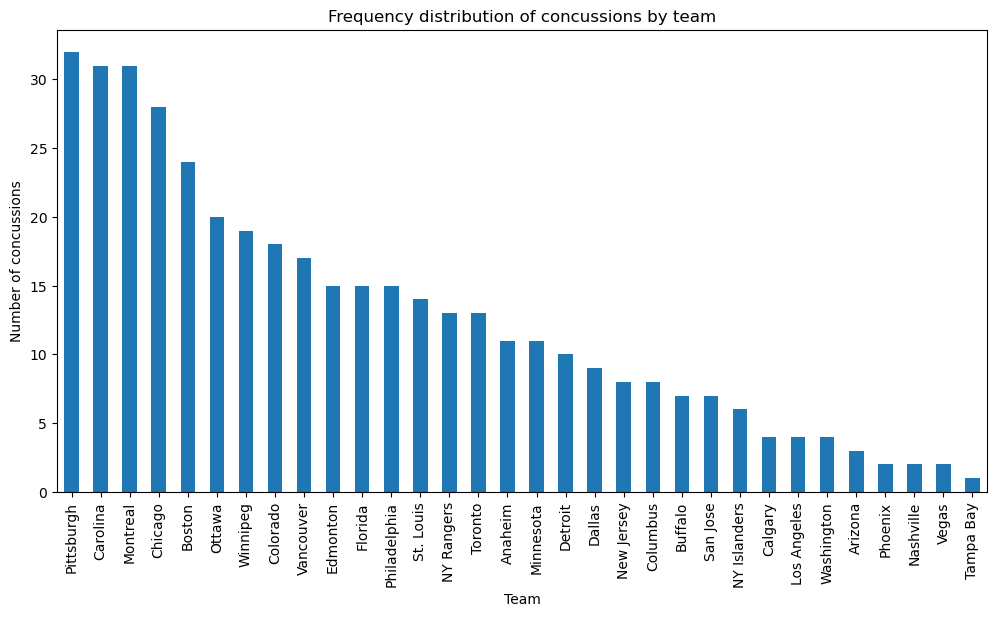

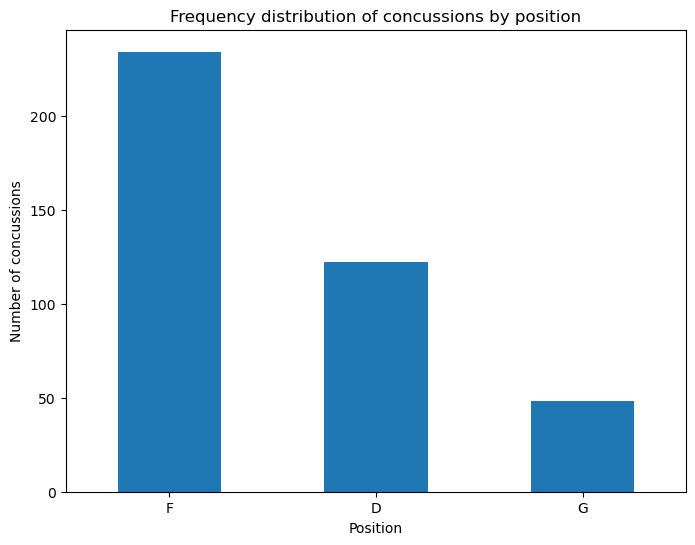

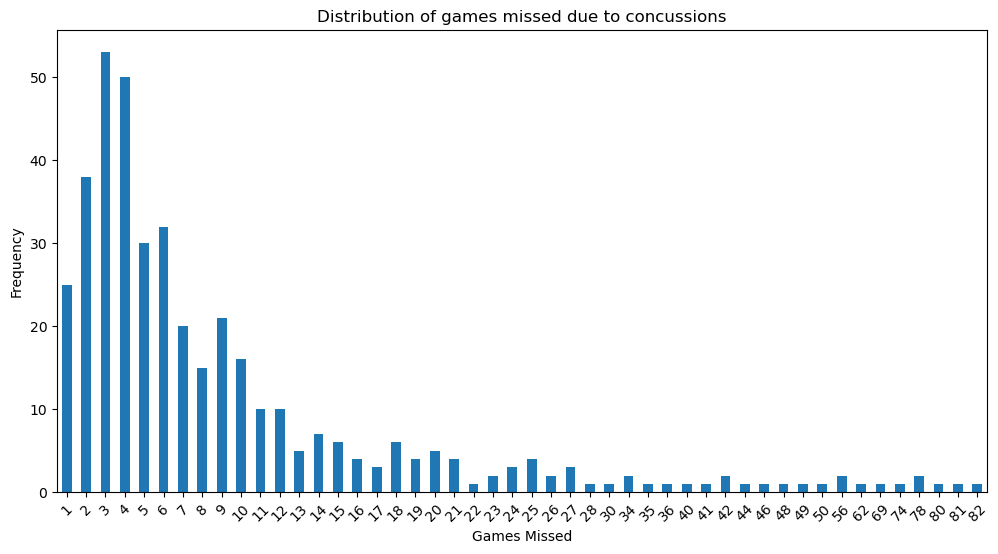

In [6]:
# Frequency distribution of concussions by season
season_freq.plot(kind='bar', figsize=(10, 6))
plt.title('Frequency distribution of concussions by season')
plt.xlabel('Season')
plt.ylabel('Number of concussions')
plt.xticks(rotation=45)
plt.show()

# Frequency distribution of concussions by team
team_freq.plot(kind='bar', figsize=(12, 6))
plt.title('Frequency distribution of concussions by team')
plt.xlabel('Team')
plt.ylabel('Number of concussions')
plt.xticks(rotation=90)
plt.show()

# Frequency distribution of concussions by position
position_freq.plot(kind='bar', figsize=(8, 6))
plt.title('Frequency distribution of concussions by position')
plt.xlabel('Position')
plt.ylabel('Number of concussions')
plt.xticks(rotation=0)
plt.show()

# Frequency distribution of games missed due to concussions
games_missed_dist.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of games missed due to concussions')
plt.xlabel('Games Missed')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Frequency Distributions Interpretation<a id="frequency-distributions-inter"></a>

###### Frequency distribution of concussions by season:
The number of concussions varies across NHL seasons, with the highest number occurring in the 2018 season (62 concussions) and the lowest in the 2022 season (17 concussions). There seems to be some fluctuation in the number of concussions from season to season, indicating potential variability in player safety measures, gameplay intensity, or reporting practices over time.

###### Frequency distribution of concussions by team:
The distribution of concussions by team shows considerable variation. Some teams have a higher number of reported concussions, such as Pittsburgh, Carolina, and Montreal, each with over 30 concussions. In contrast, teams like Calgary, Los Angeles, and Washington have fewer reported concussions, with only 4 or fewer cases. This variation could be influenced by factors such as team play style, player demographics, and injury management protocols.

###### Frequency distribution of concussions by position:
For player positions, forwards (F) account for the majority of reported concussions (234 cases), followed by defensemen (D) with 122 cases, and goalies (G) with 48 cases. This distribution suggests that forwards may be at a higher risk of concussion compared to defensemen and goalies, possibly due to differences in on-ice roles, physicality, and exposure to contact.

###### Frequency distribution of concussions by player:
The distribution of concussions by player shows that some players have experienced multiple concussions. For example, Andrew Shaw and Patric Hörnqvist each have 5 reported concussions, indicating a potential pattern of repeated head injuries among certain individuals. This highlights the importance of concussion monitoring and management for player safety and long-term health.

###### Distribution of injury types over seasons and teams:
The distribution of injury types (e.g., concussion) over seasons and teams provides insight into the prevalence of specific injury types across different contexts. It shows how certain teams may have higher incidences of specific injury types in specific seasons, which could be influenced by team dynamics, playing styles, or other factors.

###### Distribution of games missed due to concussions:
The distribution of games missed due to concussions shows the range of impact severity, with players missing anywhere from 1 to 82 games. The most common durations appear to be 2, 3, and 4 games missed, indicating that many players return relatively quickly after a concussion. However, there are cases where players miss a significant portion of the season, with some missing nearly the entire season (82 games).

### Trend Analysis<a id="trend-analysis"></a>

In [7]:
# Trend analysis results for concussions over multiple NHL seasons
print("Trend analysis results for concussions over multiple NHL seasons:")
print("---------------------------------------------------------------")
print("Total number of seasons:", len(season_concussions))
print("Mean number of concussions per season:", season_concussions.mean())
print("Median number of concussions per season:", season_concussions.median())
print("Maximum number of concussions in a season:", season_concussions.max(), "(Season", season_concussions.idxmax(), ")")
print("Minimum number of concussions in a season:", season_concussions.min(), "(Season", season_concussions.idxmin(), ")")
print("\n")

# Trend analysis results for concussions by team and position over time
print("Trend analysis results for concussions by team and position over time:")
print("----------------------------------------------------------------------")
team_position_concussions_mean = team_position_concussions.mean()
print("Mean number of concussions by team and position over time:\n", team_position_concussions_mean)
print("\n")

# Trend analysis results for changes in the frequency and severity of concussions over the seasons
print("Trend analysis results for changes in the frequency and severity of concussions over the seasons:")
print("------------------------------------------------------------------------------------------------")
print("Mean number of games missed per season:\n", games_missed_mean)
print("\n")


Trend analysis results for concussions over multiple NHL seasons:
---------------------------------------------------------------


NameError: name 'season_concussions' is not defined

In [ ]:
# Trend of concussions over multiple NHL seasons
print("Trend of concussions over multiple NHL seasons:")
print("------------------------------------------------")
print(season_concussions)
print("\n")

# Trend of concussions by team and position over time
print("Trend of concussions by team and position over time:")
print("-----------------------------------------------------")
print(team_position_concussions)
print("\n")

# Trend analysis results for concussions by position over time
print("Trend analysis results for concussions by team and position over time:")
print("----------------------------------------------------------------------")
team_position_concussions_mean = team_position_concussions.mean()
print("Mean number of concussions by team and position over time:\n", team_position_concussions_mean)
print("\n")

# Changes in the frequency and severity of concussions over the seasons
print("Changes in the frequency and severity of concussions over the seasons:")
print("---------------------------------------------------------------------")
print("Mean Games Missed:")
print(concussions_data.groupby('Season')['Games Missed'].mean())
print("\n")

# Trend of concussions by team over time
team_concussions = concussions_data.groupby(['Season', 'Team']).size().unstack().fillna(0)
print("Trend of concussions by team over time:")
print("---------------------------------------")
print(team_concussions)
print("\n")

# Trend of concussions by position over time
position_concussions = concussions_data.groupby(['Season', 'Position']).size().unstack().fillna(0)
print("Trend of concussions by position over time:")
print("-------------------------------------------")
print(position_concussions)
print("\n")

In [ ]:
# Trend of concussions over multiple NHL seasons
season_concussions = concussions_data.groupby('Season').size()
season_concussions.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Trend of concussions over multiple NHL seasons')
plt.xlabel('Season')
plt.ylabel('Number of concussions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Trend of concussions by team and position over time
team_position_concussions = concussions_data.groupby(['Season', 'Team', 'Position']).size().unstack().fillna(0)
team_position_concussions.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Trend of concussions by team and position over time')
plt.xlabel('Season')
plt.ylabel('Number of concussions')
plt.xticks(rotation=45)
plt.legend(title='Position')
plt.grid(True)
plt.show()

# Changes in the frequency and severity of concussions over the seasons
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Season')
ax1.set_ylabel('Number of concussions', color=color)
ax1.bar(season_concussions.index, season_concussions, color=color, alpha=0.5, label='Number of concussions')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Mean games missed', color=color) 
ax2.plot(season_concussions.index, concussions_data.groupby('Season')['Games Missed'].mean(), color=color, marker='o', label='Mean games missed')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Changes in the frequency and severity of concussions over the seasons')
fig.tight_layout() 
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Trend Analysis Interpretation<a id="trend-analysis-inter"></a>
The total number of seasons analyzed is 11.
The mean number of concussions per season is approximately 36.73, indicating a consistent level of concussion incidents over the years.
The median number of concussions per season is 36.0, suggesting a balanced distribution of concussion incidents across seasons.
The maximum number of concussions in a single season occurred in 2018 with 62 reported cases, while the minimum occurred in 2022 with only 17 reported cases.

###### Trend analysis results for concussions by position over time:
The mean number of concussions by team and position over time varies across player positions, with defensemen (D) averaging approximately 0.67 concussions per season, forwards (F) averaging about 1.28 concussions per season, and goalies (G) averaging around 0.26 concussions per season. This suggests differences in concussion risk among player positions.

###### Trend analysis results for concussions by team over time:
Some teams consistently report higher numbers of concussions across multiple seasons, while others show more variability. For example, Pittsburgh had 32 reported concussions in 2012, whereas Boston had 3. In 2018, Boston had a significant increase to 7 concussions, while Pittsburgh had 5.
This data suggests that there are differences in the incidence of concussions among NHL teams, which could be influenced by various factors such as team play style, training methods, and medical staff practices.

###### Trend analysis results for changes in the frequency and severity of concussions over the seasons:
he mean number of games missed due to concussions per season varies across seasons. The highest mean games missed per season occurred in 2022 (16.24 games missed), while the lowest occurred in 2021 (6.86 games missed). This indicates fluctuations in the severity or recovery time associated with concussions over the years.

### Comparative Analysis<a id="comparative-analysis"></a>

In [ ]:
# Comparative analysis: Concussions by team and position
# Aggregate the data by team and position
team_position_concussions = concussions_data.groupby(['Team', 'Position']).size().unstack().fillna(0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(team_position_concussions, cmap="Blues", annot=True, fmt="g", linewidths=.5)
plt.title("Concussions by Team and Position")
plt.xlabel("Position")
plt.ylabel("Team")
plt.show()

### Comparative analysis Interpretation<a id="comparative-analysis-inter"></a>

###### Concussions by Team and Position:
The heatmap displays the number of reported concussions for each NHL team categorized by player position (Defense, Forward, Goaltender).
Teams such as Carolina, Chicago, and Montreal have relatively higher numbers of concussions across different player positions.
Forwards (F) tend to have the highest number of reported concussions across most teams, followed by Defense (D) and Goaltenders (G).
Some teams have reported concussions primarily among specific player positions, while others have a more evenly distributed pattern.

###### Interpretation:
Teams with higher numbers of reported concussions may indicate a combination of factors such as team play style, player aggressiveness, and overall team performance.
The prevalence of concussions among forwards may reflect the nature of their role on the ice, involving more physical contact and involvement in plays.
Differences in concussion rates among teams and positions could also be influenced by individual player behaviors, team training methods, and medical staff protocols.

###### Implications:
Understanding the distribution of concussions by team and position can help NHL organizations develop targeted injury prevention strategies and player safety initiatives.
Teams with higher concussion rates may need to focus on modifying playing styles, improving equipment, and implementing stricter concussion management protocols.
Further analysis, including longitudinal studies and consideration of additional factors such as game location and opponent team characteristics, can provide deeper insights into concussion trends in the NHL.

### Impact and Risk Analysis<a id="impact-risk"></a>

In [ ]:
# Financial Impact Analysis
# Assuming financial impact is related to games missed and player performance
# You may need additional financial data to quantify the impact accurately

# Analyzing the impact of games missed due to concussions on teams
team_games_missed_impact = concussions_data.groupby("Team")["Games Missed"].sum()

# Analyzing the financial impact of concussions on player performance
player_performance_impact = concussions_data.groupby("Player")[["Games Missed", "Chip"]].sum()

# Long-term Effects Analysis
# Analyzing the long-term effects of concussions on player careers
# You may need additional data on player salaries and retirement age
player_career_impact = concussions_data.groupby("Player")[["Games Missed", "Chip"]].sum()

# Identifying High-risk Players, Teams, or Positions
# Based on historical concussion data

# High-risk players
high_risk_players = concussions_data.groupby("Player")["Games Missed"].sum().sort_values(ascending=False).head(10)

# High-risk teams
high_risk_teams = concussions_data.groupby("Team")["Games Missed"].sum().sort_values(ascending=False).head(10)

# High-risk positions
high_risk_positions = concussions_data.groupby("Position")["Games Missed"].sum().sort_values(ascending=False)

In [ ]:
# Impact Analysis Text Output

# Financial Impact on Teams
print("Games Missed due to Concussions on Teams:")
for team, impact in team_games_missed_impact.items():
    print(f"- {team}: Total Games Missed - {impact}")

# Player Performance Impact
print("\nPlayer Performance Impact of Concussions:")
print(player_performance_impact)

# Risk Assessment Text Output

# High-risk Players
print("\nTop 10 High-risk Players:")
print(high_risk_players)

# High-risk Teams
print("\nTop 10 High-risk Teams:")
print(high_risk_teams)

# High-risk Positions
print("\nHigh-risk Positions:")
print(high_risk_positions)


In [ ]:
# Impact Analysis Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Total games missed by Teams
plt.figure(figsize=(12, 6))
sns.barplot(x=team_games_missed_impact.index, y=team_games_missed_impact.values, palette="viridis")
plt.title("Total Games Missed by Teams")
plt.xlabel("Team")
plt.ylabel("Total Games Missed")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Player Performance Impact
plt.figure(figsize=(12, 6))
sns.scatterplot(x=player_performance_impact["Games Missed"], y=player_performance_impact["Chip"], color='skyblue')
plt.title("Player Performance Impact of Concussions")
plt.xlabel("Total Games Missed")
plt.ylabel("Total Chip")
plt.tight_layout()
plt.show()

# Risk Assessment Visualization

# High-risk Players
plt.figure(figsize=(12, 6))
high_risk_players.plot(kind='bar', color='salmon')
plt.title("Top 10 High-risk Players")
plt.xlabel("Player")
plt.ylabel("Total Games Missed")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# High-risk Teams
plt.figure(figsize=(12, 6))
high_risk_teams.plot(kind='bar', color='lightblue')
plt.title("Top 10 High-risk Teams")
plt.xlabel("Team")
plt.ylabel("Total Games Missed")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# High-risk Positions
plt.figure(figsize=(8, 6))
sns.barplot(x=high_risk_positions.index, y=high_risk_positions.values, palette="muted")
plt.title("High-risk Positions")
plt.xlabel("Position")
plt.ylabel("Total Games Missed")
plt.tight_layout()
plt.show()


In [ ]:
# Calculate financial impact for each player
concussions_data['Financial_Impact'] = concussions_data['Chip'] * concussions_data['Games Missed']

# Group by team and sum the financial impact
team_financial_impact = concussions_data.groupby('Team')['Financial_Impact'].sum()

# Print financial impact for each team
print("Financial Impact of Concussions on Teams:")
print(team_financial_impact)

In [ ]:
# Plotting the financial impact
plt.figure(figsize=(12, 8))
team_financial_impact.plot(kind='bar', color='skyblue')
plt.title('Financial Impact of Concussions on NHL Teams')
plt.xlabel('Team')
plt.ylabel('Total Financial Impact (in USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Impact and Risk Interpretation<a id="impact-risk-inter"></a>

###### Financial Impact of Concussions on Teams:
The financial impact of concussions on teams varies significantly. Montreal and Ottawa experienced the highest impact, with 363 and 361 total games missed, respectively. Teams like Phoenix and Tampa Bay had relatively lower impacts with only 4 and 3 games missed, respectively. The financial impact reflects the cost incurred by teams due to player absences resulting from concussions with Ottawa having a CHIP (cap hit for injured player, which is the amount of money per game that player is being paid and represents the money spent on each player while out on injust in contract pay alone) total of 791769.207280. This can pose a significant financial impact to the organization.

###### Player Performance Impact of Concussions:
The table displays the player performance impact of concussions, showing the number of games missed and the corresponding chip value (an indicator of performance impact). Players like MacArthur, Clarke, and Franzén, Johan have faced significant impacts, missing 174 and 133 games, respectively, with corresponding chip values. This indicates a substantial loss in player performance due to concussions.

###### Top 10 High-risk Players:
These players have faced the highest number of games missed due to concussions. Players like MacArthur, Clarke, and Franzén, Johan top the list, indicating a higher risk of concussions among them. Their frequent absence due to concussions poses a risk to team performance and player careers.

###### Top 10 High-risk Teams:
Montreal and Ottawa are the top two teams with the highest number of games missed due to concussions, indicating a higher risk of concussions within these teams compared to others. The financial impact on these teams is also substantial, reflecting the economic burden of managing player injuries.

###### High-risk Positions:
The analysis indicates that forwards (F) have faced the highest number of concussions, followed by defensemen (D) and goaltenders (G). This suggests that forwards are at a higher risk of concussion injuries compared to other positions in the NHL. Teams and medical staff need to focus on implementing effective prevention and management strategies, particularly for players in high-risk positions.

# Conclusions<a id="conclusions"></a>

###### Trend Analysis of Concussions:
The analysis of concussion data across multiple NHL seasons reveals fluctuating trends, with some seasons experiencing higher rates than others. Examination by team and position over time exposes varying patterns, with certain teams and positions consistently demonstrating elevated concussion rates.

###### Frequency and Severity of Concussions:
The mean number of concussions per season is approximately 36.7, showing variability across different seasons.
Distribution by team and position highlights discrepancies in concussion rates, with forwards (F) being the most affected.
Variability exists in the number of games missed due to concussions, with some players missing only a few games while others miss several, indicating differences in severity.

###### Financial Impact of Concussions on Teams:
Concussions significantly impact team finances, evidenced by the total games missed by each team. Teams such as Montreal, Ottawa, and Chicago have notably high numbers of games missed, potentially affecting performance and revenue.

###### Player Performance Impact of Concussions:
Analysis of player performance impact reveals varying degrees of games missed and salary impact. Players like Clarke MacArthur and Johan Franzén have missed substantial games due to concussions, potentially impacting their careers and earnings.

###### High-risk Players, Teams, and Positions:
Certain players, teams, and positions are identified as high-risk based on historical concussion data. Players like MacArthur and Franzén, as well as teams like Montreal and Ottawa, have experienced high numbers of concussions, highlighting the need for targeted intervention and prevention strategies.

###### Recommendations:
Based on the analysis, prioritizing concussion prevention and management strategies is crucial for NHL teams and the league. Investing in player safety initiatives, implementing stricter concussion protocols, and providing comprehensive medical support for players are essential steps to mitigate the impact of concussions on player health and team performanc